In [54]:
import matplotlib.pyplot as plt
import numpy as np
import logging
import sys
sys.path.insert(0,'..')
import utils
#
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 30
matplotlib.rcParams['xtick.labelsize'] = 30
matplotlib.rcParams['axes.xmargin'] = 0
#matplotlib.rcParams['axes.ymargin'] = 0
import pickle as pkl
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [82]:
with open(r"vars/logs_1,05,5,2_lr_1e-1_fixed_batch_track_penalty.pickle", "rb") as handle:
    logs_1 = pkl.load(handle)
with open(r"vars/logs_1,1,1,1_lr_1e-1_fixed_batch_track_penalty.pickle", "rb") as handle:
    logs_2 = pkl.load(handle)
with open(r"vars/logs_1,1,0,0_lr_1e-1_fixed_5_batch_track_penalty.pickle", "rb") as handle:
    logs_3 = pkl.load(handle)

In [90]:
entries_to_remove = np.arange(61,200,1)
for k in entries_to_remove:
    logs_3.pop(k, None)
entries_to_remove = np.arange(71,200,1)
for k in entries_to_remove:
    logs_1.pop(k, None)
    logs_2.pop(k, None)
    logs_3.pop(k, None)

In [91]:
#print('Weigths w/o constraints', end=' ')
#print(logs_1[65][4][-1], end=' ')
#print(logs_1[65][5][-1])
#print('Weigths w/ constraints', end=' ')
#print(logs_2[65][4][-1], end=' ')
#print(logs_2[65][5][-1])

In [92]:
# Dictionary composed as
# iteration, X_log, U_log, delta, weights, theta, l(s,a)
#steps_1 = logs_1[1][0]
#X_log_1 = logs_1[1][1]
#delta_1 = np.array(logs_1[1][3], dtype=float).flatten()
#weights_1 = np.array(logs_1[1][4], dtype=float).reshape(-1,6)
#theta_1 = np.array(logs_1[1][5], dtype=float).reshape(-1,4)
#stage_cost_1 = np.array(logs_1[1][6], dtype=float).flatten()
##
#steps_2 = logs_2[1][0]
#X_log_2 = logs_2[1][1]
#delta_2 = np.array(logs_2[1][3], dtype=float).flatten()
#weights_2 = np.array(logs_2[1][4], dtype=float).reshape(-1,6)
#theta_2 = np.array(logs_2[1][5], dtype=float).reshape(-1,4)
#stage_cost_2 = np.array(logs_2[1][6], dtype=float).flatten()

In [93]:
lap_labels_1 = [1] + list(np.arange(5,len(logs_1),10))
lap_values_1 = []
lap_labels_2 = [1] + list(np.arange(5,len(logs_2),10))
lap_values_2 = []
lap_labels_3 = [1] + list(np.arange(5,len(logs_3),10))
lap_values_3 = []

steps_1 = np.array([])
delta_1 = np.array([])
X_1 = np.array([[0, 0, 0, 0, 0]])
weights_1 = np.array([[1, 0.5, 5, 0, 0, 2]])
theta_1 = np.array([[0, 0, 0, 0]])
stage_cost_1 = np.array([])
#
lap_values_2 = []
steps_2 = np.array([])
delta_2 = np.array([])
X_2 = np.array([[0, 0, 0, 0, 0]])
weights_2 = np.array([[1, 0.5, 5, 0, 0, 2]])
theta_2 = np.array([[0, 0, 0, 0]])
stage_cost_2 = np.array([])
#
lap_values_3 = []
steps_3 = np.array([])
delta_3 = np.array([])
X_3 = np.array([[0, 0, 0, 0, 0]])
weights_3 = np.array([[1, 0.5, 5, 0, 0, 2]])
theta_3 = np.array([[0, 0, 0, 0]])
stage_cost_3 = np.array([])

for key in logs_1.keys():
    if key in lap_labels_1:
        lap_values_1.append(np.array(logs_1[key][0], dtype=int).flatten()[-1])
    steps_1 = np.concatenate((steps_1, np.array(logs_1[key][0], dtype=int).flatten()))
    X_1 = np.concatenate((X_1, np.array(logs_1[key][1].T, dtype=float).reshape(-1,5)))
    delta_1 = np.concatenate((delta_1, np.array(logs_1[key][3], dtype=float).flatten()))
    weights_1 = np.concatenate((weights_1, np.array(logs_1[key][4], dtype=float).reshape(-1,6)), axis=0)
    theta_1 = np.concatenate((theta_1, np.array(logs_1[key][5], dtype=float).reshape(-1,4)), axis=0)
    stage_cost_1 = np.concatenate((stage_cost_1, np.array(logs_1[key][6], dtype=int).flatten()))
    
for key in logs_2.keys():
    if key in lap_labels_2:
        lap_values_2.append(np.array(logs_2[key][0], dtype=int).flatten()[-1])
    steps_2 = np.concatenate((steps_2, np.array(logs_2[key][0], dtype=int).flatten()))
    X_2 = np.concatenate((X_2, np.array(logs_2[key][1].T, dtype=float).reshape(-1,5)))
    delta_2 = np.concatenate((delta_2, np.array(logs_2[key][3], dtype=float).flatten()))
    weights_2 = np.concatenate((weights_2, np.array(logs_2[key][4], dtype=float).reshape(-1,6)), axis=0)
    theta_2 = np.concatenate((theta_2, np.array(logs_2[key][5], dtype=float).reshape(-1,4)), axis=0)
    stage_cost_2 = np.concatenate((stage_cost_2, np.array(logs_2[key][6], dtype=int).flatten()))
    
for key in logs_3.keys():
    if key in lap_labels_3:
        lap_values_3.append(np.array(logs_3[key][0], dtype=int).flatten()[-1])
    steps_3 = np.concatenate((steps_3, np.array(logs_3[key][0], dtype=int).flatten()))
    X_3 = np.concatenate((X_3, np.array(logs_3[key][1].T, dtype=float).reshape(-1,5)))
    delta_3 = np.concatenate((delta_3, np.array(logs_3[key][3], dtype=float).flatten()))
    weights_3 = np.concatenate((weights_3, np.array(logs_3[key][4], dtype=float).reshape(-1,6)), axis=0)
    theta_3 = np.concatenate((theta_3, np.array(logs_3[key][5], dtype=float).reshape(-1,4)), axis=0)
    stage_cost_3 = np.concatenate((stage_cost_3, np.array(logs_3[key][6], dtype=int).flatten()))

/tmp/ipykernel_3717/172769706.py:39: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  stage_cost_1 = np.concatenate((stage_cost_1, np.array(logs_1[key][6], dtype=int).flatten()))
/tmp/ipykernel_3717/172769706.py:49: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  stage_cost_2 = np.concatenate((stage_cost_2, np.array(logs_2[key][6], dtype=int).flatten()))
/tmp/ipykernel_3717/172769706.py:59: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arr

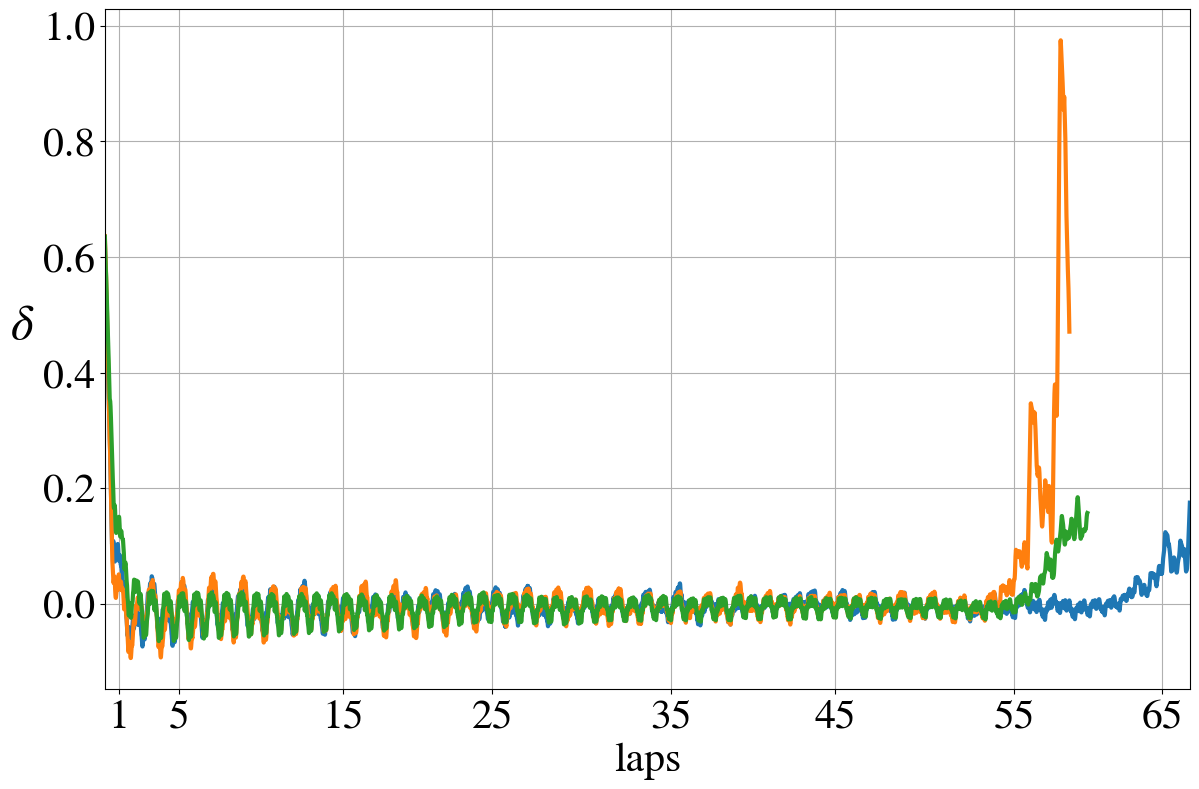

In [116]:
fig, ax = plt.subplots(1,1,figsize=(14,9), dpi=100)
ax.plot(moving_average(delta_1[30:], 500), label='Objective-driven', lw=3)
ax.plot(moving_average(delta_2[30:], 500), label='Balanced', lw=3)
ax.plot(moving_average(delta_3[30:], 500), label='Tracking-oriented', lw=3)
ax.set_xlabel('laps')
ax.set_ylabel('$\delta$', rotation=0, labelpad=15, fontsize=35)
ax.set_xticks(lap_values_1)
ax.set_xticklabels(lap_labels_1)
ax.grid(True)
#ax.set_axis_off()
plt.savefig('training_params_initialization_comparison_delta.eps', format='eps', bbox_inches="tight")
# get handles and labels for reuse
label_params = ax.get_legend_handles_labels()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


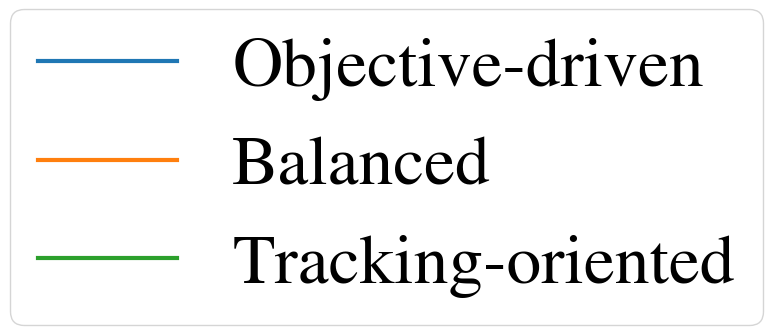

In [118]:
figl, axl = plt.subplots(dpi=100)
axl.axis(False)
axl.legend(*label_params, loc="center", bbox_to_anchor=(0.5, 0.5), prop={"size":50})
figl.savefig('training_params_initialization_comparison_legend.eps', format='eps', bbox_inches="tight")

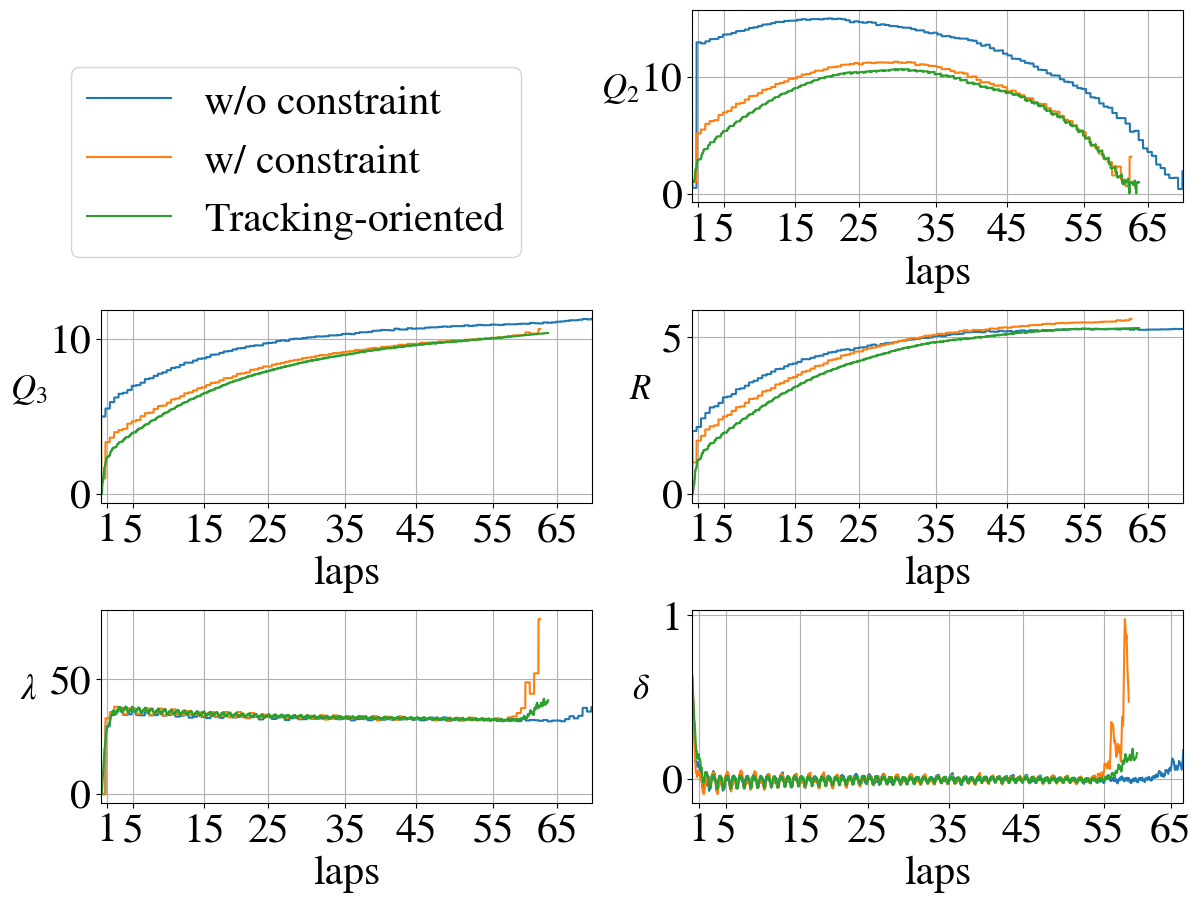

In [102]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,constrained_layout=False, figsize=(12, 9), dpi=100)
#ax1.plot(weights_1[:,0], label='Expert')
#ax1.plot(weights_2[:,0], label='Balanced')
#ax1.plot(weights_3[:,0], label='Safe Start')
#ax1.legend()
#ax1.set_xlabel('laps')
#ax1.set_ylabel('$Q_1$', rotation=0, labelpad=15, fontsize=25)
##ax1.set_xticks(lap_values_1)
#ax1.set_xticklabels(lap_labels_1)
#ax1.grid(True)
ax1.set_axis_off()
ax2.plot(weights_1[:,1], label='Expert')
ax2.plot(weights_2[:,1], label='Balanced')
ax2.plot(weights_3[:,1], label='Safe Start')
#ax2.legend()
ax2.set_xlabel('laps')
ax2.set_ylabel('$Q_2$', rotation=0, labelpad=15, fontsize=25)
ax2.set_xticks(lap_values_1)
ax2.set_xticklabels(lap_labels_1)
ax2.grid(True)

ax3.plot(weights_1[:,2], label='Expert')
ax3.plot(weights_2[:,2], label='Balanced')
ax3.plot(weights_3[:,2], label='Safe Start')
#ax3.legend()
ax3.grid(True)
ax3.set_xlabel('laps')
ax3.set_ylabel('$Q_3$', rotation=0, labelpad=15, fontsize=25)
ax3.set_xticks(lap_values_1)
ax3.set_xticklabels(lap_labels_1)

ax4.plot(weights_1[:,5], label='Expert')
ax4.plot(weights_2[:,5], label='Balanced')
ax4.plot(weights_3[:,5], label='Safe Start')
#ax4.legend()
ax4.grid(True)
ax4.set_xlabel('laps')
ax4.set_ylabel('$R$', rotation=0, labelpad=15, fontsize=25)
ax4.set_xticks(lap_values_1)
ax4.set_xticklabels(lap_labels_1)

ax5.plot(theta_1[:,0], label='Expert')
ax5.plot(theta_2[:,0], label='Balanced')
ax5.plot(theta_3[:,0], label='Safe Start')
#ax1.plot(np.array(theta_vect).reshape(-1,4)[:,1], label=r'$\theta_{V,1}$')
#ax1.plot(np.array(theta_vect).reshape(-1,4)[:,2], label=r'$\theta_{V,2}$')
#ax1.plot(np.array(theta_vect).reshape(-1,4)[:,3], label=r'$\theta_{V,3}$')
#ax5.legend()
ax5.set_xlabel('laps')
ax5.set_ylabel(r'$\lambda$', rotation=0, labelpad=15, fontsize=25)
ax5.set_xticks(lap_values_1)
ax5.set_xticklabels(lap_labels_1)
ax5.grid(True)

ax6.plot(moving_average(delta_1[30:], 500), label='w/o constraint')
ax6.plot(moving_average(delta_2[30:], 500), label='w/ constraint')
ax6.plot(moving_average(delta_3[30:], 500), label='Tracking-oriented')
#ax6.legend()
#ax2.plot(np.array(delta_vect).flatten())
ax6.grid(True)
ax6.set_xlabel('laps')
ax6.set_ylabel(r'$\delta$', rotation=0, labelpad=15, fontsize=25)
ax6.set_xticks(lap_values_1)
ax6.set_xticklabels(lap_labels_1)

handles, labels = ax6.get_legend_handles_labels()
fig.legend(handles, labels, ncol=1, bbox_to_anchor=(0.45,0.95), fontsize=30)

plt.tight_layout(pad=0.2)
#plt.savefig('1,05,5,2_training_params_wandwithout_comparison.eps', format='eps', bbox_inches="tight")
plt.show()

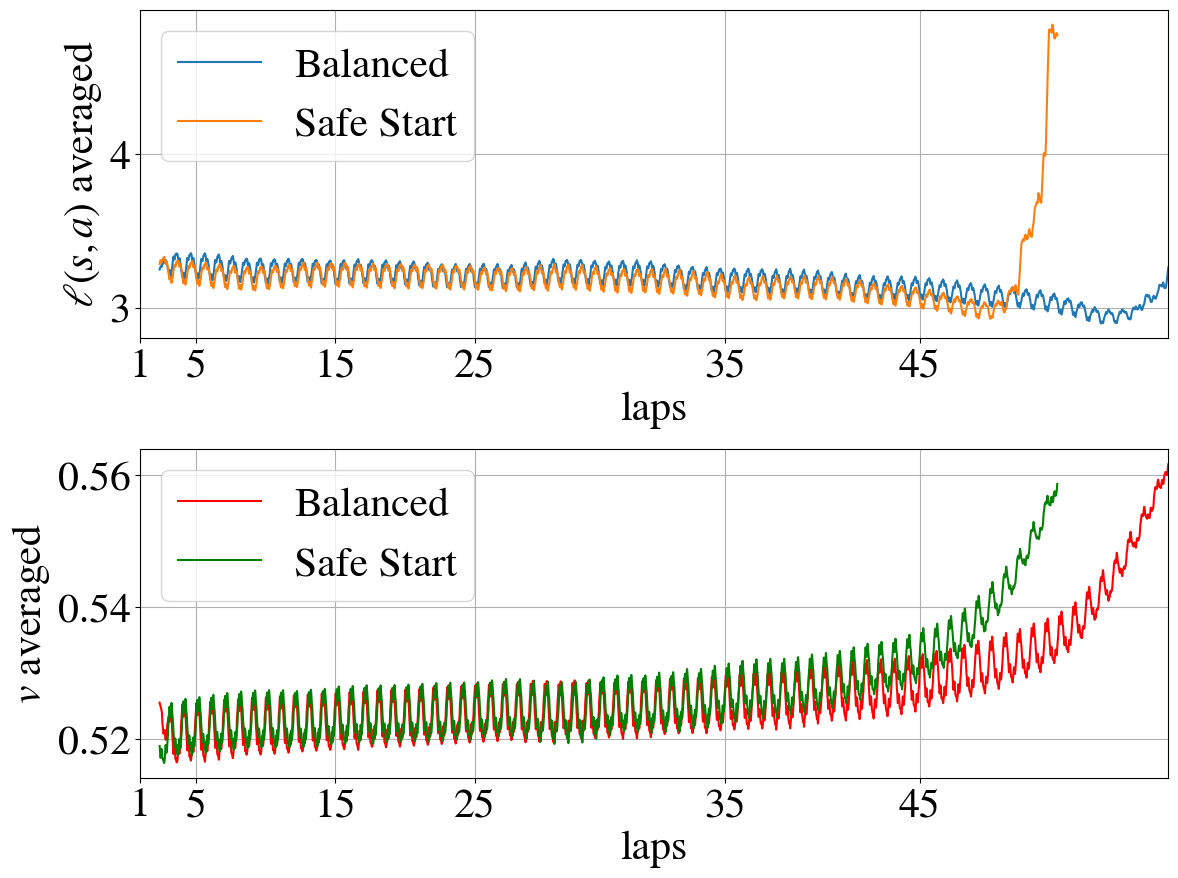

In [97]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,9), dpi=100)
ax1.plot(steps_1[509:], moving_average(np.array(stage_cost_1[10:]).flatten(), 500), label='Balanced')
ax1.plot(steps_2[509:], moving_average(np.array(stage_cost_2[10:]).flatten(), 500), label='Safe Start')
ax1.set_xticks(lap_values_2)
ax1.set_xticklabels(lap_labels_2)
ax1.grid(True)
ax1.legend()
ax1.set_xlabel('laps')
ax1.set_ylabel('$\ell(s,a)$ averaged')

ax2.plot(steps_1[509:], moving_average(X_1[11:,3], 500), c='r', label='Balanced')
ax2.plot(steps_2[509:], moving_average(X_2[11:,3], 500), c='g', label='Safe Start')
ax2.set_xticks(lap_values_2)
ax2.set_xticklabels(lap_labels_2)
ax2.grid(True)
ax2.legend()
ax2.set_xlabel('laps')
ax2.set_ylabel('$v$ averaged')


#ax3.plot(steps_1[9:], X_1[10:,3])
#ax3.plot(steps_2[9:], X_2[10:,3])
#ax3.set_xticks(lap_values_1)
#ax3.set_xticklabels(lap_labels)
#ax3.grid(True)
#ax3.set_xlabel('laps')
#ax3.set_ylabel('$v$')

plt.tight_layout(pad=0.5)
#plt.savefig('1,05,5,2_training_speed_initialization.eps', format='eps')
plt.show()

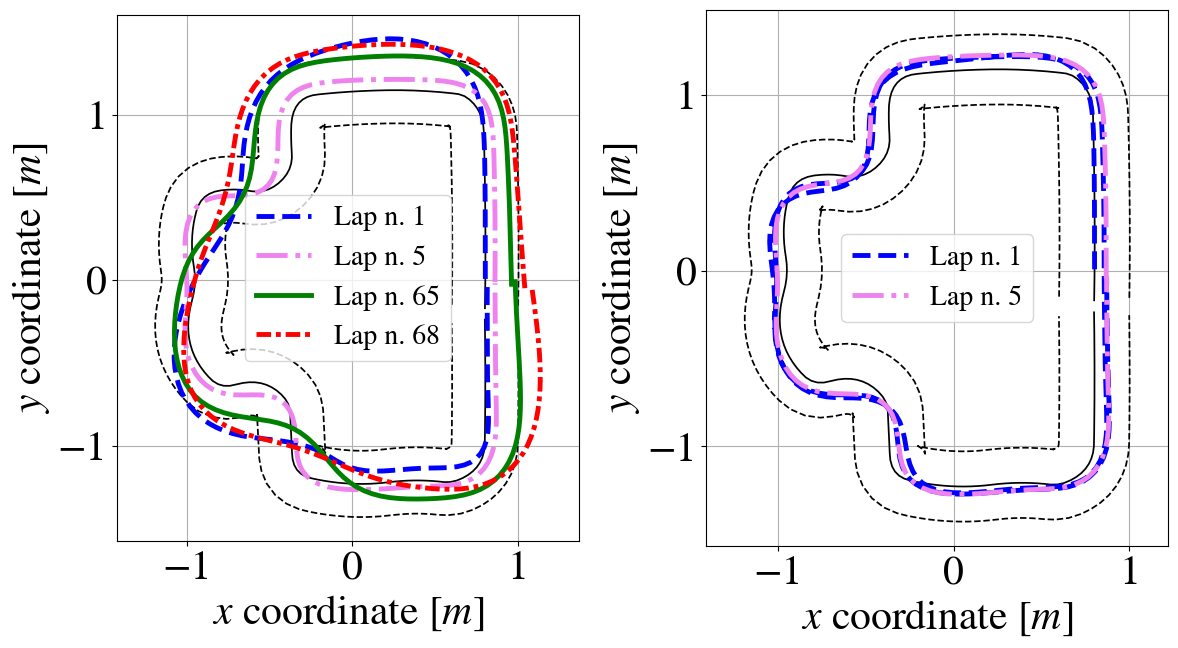

In [98]:
with open(r"vars/trajectory.pickle", "rb") as handle:
    traj = pkl.load(handle)
with open(r"vars/inside.pickle", "rb") as handle:
    inside = pkl.load(handle)
with open(r"vars/outside.pickle", "rb") as handle:
    outside = pkl.load(handle)
    
fig, (ax1, ax2) = plt.subplots(1,2, dpi=100, figsize=(12,9))
ax1.plot(traj[:,0], traj[:,1], "k", lw=1.25)
ax1.plot(inside[:,0], inside[:,1], "k--", lw=1.25)
ax1.plot(outside[:,0], outside[:,1], "k--", lw=01.25)
ax2.plot(traj[:,0], traj[:,1], "k", lw=1.25)
ax2.plot(inside[:,0], inside[:,1], "k--", lw=1.25)
ax2.plot(outside[:,0], outside[:,1], "k--", lw=01.25)
#ax1.text(X_log[0,0], X_log[1,0], 'START')

for i, (key, val) in enumerate(logs_1.items()):
    #print(val[1].shape)
    #ax_dict["A"].plot(val[1][0,:], val[1][1,:], label='Lap n. %i'%(i+1))
    if i==0 or i==4 or i==64 or i==67:
        if i==0:
            c = 'b'
            linestyle = '--'
        elif i==4:
            c = 'violet'
            linestyle = '-.'
        elif i==64:
            c = 'green'
            linestyle = '-'
        elif i==67:
            c = 'r'
            linestyle = (0, (3, 1, 1, 1))
            #lw=2
        ax1.plot(val[1][0,:], val[1][1,:], color=c, linestyle=linestyle, lw=3.5, label='Lap n. %i'%(i+1))
        
for i, (key, val) in enumerate(logs_2.items()):
    #print(val[1].shape)
    #ax_dict["A"].plot(val[1][0,:], val[1][1,:], label='Lap n. %i'%(i+1))
    if i==0 or i==4 or i==64 or i==67:
        if i==0:
            c = 'b'
            linestyle = '--'
        elif i==4:
            c = 'violet'
            linestyle = '-.'
        elif i==64:
            c = 'green'
            linestyle = '-'
        elif i==67:
            c = 'r'
            linestyle = (0, (3, 1, 1, 1))
            #lw=2
        ax2.plot(val[1][0,:], val[1][1,:], color=c, linestyle=linestyle, lw=3.5, label='Lap n. %i'%(i+1))
        

ax1.grid(True)
ax1.margins(x=0.1)
#plt.gca().set_aspect('equal')
#ax1.set_xlim(-1,5,1.5)
ax1.legend(fontsize=20)
ax1.set_aspect('equal')
ax1.set_xlabel('$x$ coordinate [$m$]')
ax1.set_ylabel('$y$ coordinate [$m$]')

#ax2.legend()
ax2.grid(True)
ax2.margins(x=0.1)
#ax2.set_xlim(-1,5,1.5)
ax2.legend(fontsize=20)
ax2.set_aspect('equal')
ax2.set_xlabel('$x$ coordinate [$m$]')
ax2.set_ylabel('$y$ coordinate [$m$]')

plt.tight_layout(pad=0.5)
plt.grid(True)
#plt.savefig('1,05,5,2_training_laps_comparison.eps', format='eps')
plt.show()